# Instrument Data Access and Assignment

In [1]:
import datetime as dt
import numpy as np

In [2]:
import pysat

In [11]:
# Set data directory if user hasn't already set one
print(f"old: {pysat.params['data_dirs']}")
if len(pysat.params['data_dirs']) == 0 or pysat.params['data_dirs'] == ['.']:
    # Set a directory for pysat to use for data
    pysat.params['data_dirs'] = '/home/jovyan/scratch_space/.pysat/'
else:
    print('pysat directory has been set previously. Leaving unchanged.')

print(f"new: {pysat.params['data_dirs']}")

old: ['/home/jovyan/scratch_space/.pysat']
pysat directory has been set previously. Leaving unchanged.
new: ['/home/jovyan/scratch_space/.pysat']


In [12]:
# Create test Instrument
inst = pysat.Instrument('pysat', 'testing')

# Load data
inst.load(date=inst.files.start_date)

In [13]:
# Assign new variables
inst['new_mlt'] = inst['mlt']

In [14]:
# Partially assign data
idx, = np.where(inst['mlt'] > 23.)
inst[idx, 'mlt'] = np.arange(len(idx))

<AxesSubplot:xlabel='Epoch'>

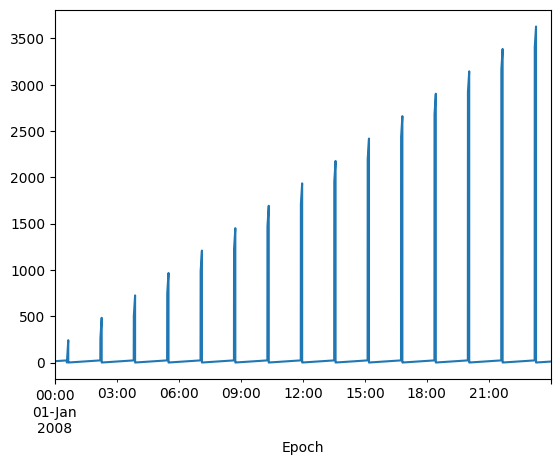

In [15]:
# Verify that magnetic local time signal now has a series of increasing spikes
inst['mlt'].plot()

In [16]:
# Access subset of data
inst[idx]

,uts,mlt,slt,longitude,latitude,altitude,orbit_num,dummy1,dummy2,dummy3,dummy4,string_dummy,unicode_dummy,int8_dummy,int16_dummy,int32_dummy,int64_dummy,new_mlt
Epoch,,,,,,,,,,,,,,,,,,
2008-01-01 00:34:58,2098.0,0.0,23.084536,231.807692,86.945885,400.0,0,23,15,15023.0,2098.0,test,test,1,1,1,1,23.002062
2008-01-01 00:34:59,2099.0,1.0,23.088660,231.865385,86.970932,400.0,0,23,15,15023.0,2099.0,test,test,1,1,1,1,23.006186
2008-01-01 00:35:00,2100.0,2.0,23.092784,231.923077,86.995877,400.0,0,23,15,15023.0,2100.0,test,test,1,1,1,1,23.010309
2008-01-01 00:35:01,2101.0,3.0,23.096907,231.980769,87.020720,400.0,0,23,15,15023.0,2101.0,test,test,1,1,1,1,23.014433
2008-01-01 00:35:02,2102.0,4.0,23.101031,232.038462,87.045462,400.0,0,23,15,15023.0,2102.0,test,test,1,1,1,1,23.018557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-01-01 23:16:55,83815.0,3625.0,0.061856,266.250000,89.998689,400.0,14,23,17,17023.0,83815.0,test,test,1,1,1,1,23.979381
2008-01-01 23:16:56,83816.0,3626.0,0.065979,266.307692,89.999161,400.0,14,23,17,17023.0,83816.0,test,test,1,1,1,1,23.983505
2008-01-01 23:16:57,83817.0,3627.0,0.070103,266.365385,89.999528,400.0,14,23,17,17023.0,83817.0,test,test,1,1,1,1,23.987629


In [17]:
# Downselect by index and variable name
inst[idx, ['mlt', 'slt']]

,mlt,slt
Epoch,,
2008-01-01 00:34:58,0.0,23.084536
2008-01-01 00:34:59,1.0,23.088660
2008-01-01 00:35:00,2.0,23.092784
2008-01-01 00:35:01,3.0,23.096907
2008-01-01 00:35:02,4.0,23.101031
...,...,...
2008-01-01 23:16:55,3625.0,0.061856
2008-01-01 23:16:56,3626.0,0.065979
2008-01-01 23:16:57,3627.0,0.070103


In [18]:
# Downselect by datetime range and variable name
inst[inst.index[0]:inst.index[0] + dt.timedelta(seconds=15), ['mlt', 'slt']]

,mlt,slt
Epoch,,
2008-01-01 00:00:00,14.350515,14.432990
2008-01-01 00:00:01,14.354639,14.437113
2008-01-01 00:00:02,14.358763,14.441237
2008-01-01 00:00:03,14.362887,14.445361
2008-01-01 00:00:04,14.367010,14.449485
2008-01-01 00:00:05,14.371134,14.453608
2008-01-01 00:00:06,14.375258,14.457732
2008-01-01 00:00:07,14.379381,14.461856
2008-01-01 00:00:08,14.383505,14.465979
